In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

archivo_csv = "MatrizTMI.csv"
datos = pd.read_csv(archivo_csv)

print(datos)

      ID_CIDERH REGION   FECHA_RBE  TEMP_MEDIA_RBE      LAT_Y      LON_X
0      M_001_AH      I  2004-11-01        8.310000 -20.678125 -68.707308
1      M_001_AH      I  2004-11-02        7.170000 -20.678125 -68.707308
2      M_001_AH      I  2004-11-03        6.894000 -20.678125 -68.707308
3      M_001_AH      I  2004-11-04        7.800000 -20.678125 -68.707308
4      M_001_AH      I  2004-11-05        8.010000 -20.678125 -68.707308
...         ...    ...         ...             ...        ...        ...
62100  M_005_AH      I  2011-12-27       10.179167 -20.325063 -68.894615
62101  M_005_AH      I  2011-12-28        8.987500 -20.325063 -68.894615
62102  M_005_AH      I  2011-12-29        9.275000 -20.325063 -68.894615
62103  M_005_AH      I  2011-12-30        8.483333 -20.325063 -68.894615
62104  M_005_AH      I  2011-12-31        8.687500 -20.325063 -68.894615

[62105 rows x 6 columns]


In [2]:
df_original = pd.read_csv('MatrizTMI.csv')

df_nuevo = pd.DataFrame()

for estacion in df_original['ID_CIDERH'].unique():
    df_estacion = df_original[df_original['ID_CIDERH'] == estacion]
    
    df_nuevo[estacion] = df_estacion['TEMP_MEDIA_RBE'].reset_index(drop=True)

df_nuevo.to_csv('VMTMI.csv', index=False)

archivo_csv2 = "VMTMI.csv"
datos2 = pd.read_csv(archivo_csv2)

print(datos2)

      M_001_AH  M_001_AJ    M_001_Q  M_002_AH  M_002_AJ   M_002_H    M_002_Q  \
0     8.310000      15.8  11.858333      -4.4  4.627875  7.280000  13.116667   
1     7.170000      15.7  12.258333      -2.9  2.867208  6.674000  12.633333   
2     6.894000      16.1  12.487500      -4.1  2.775875  6.071000  13.437500   
3     7.800000      15.2  12.045833      -3.0  3.657583  7.330000  15.112500   
4     8.010000      14.7  12.341667      -4.1  4.657500  7.680000  14.937500   
...        ...       ...        ...       ...       ...       ...        ...   
1345  1.651667      16.6  15.000000       NaN       NaN  3.204167  22.220833   
1346  2.722917      16.9  13.954167       NaN       NaN  3.375417  21.916667   
1347  3.689583      15.9  14.100000       NaN       NaN  0.482500  21.695833   
1348  4.744167      15.4  11.908333       NaN       NaN  0.291250  22.429167   
1349  5.014167      14.0  14.395833       NaN       NaN  0.510417  22.916667   

        M_002_W  M_003_AH   M_003_H  ..

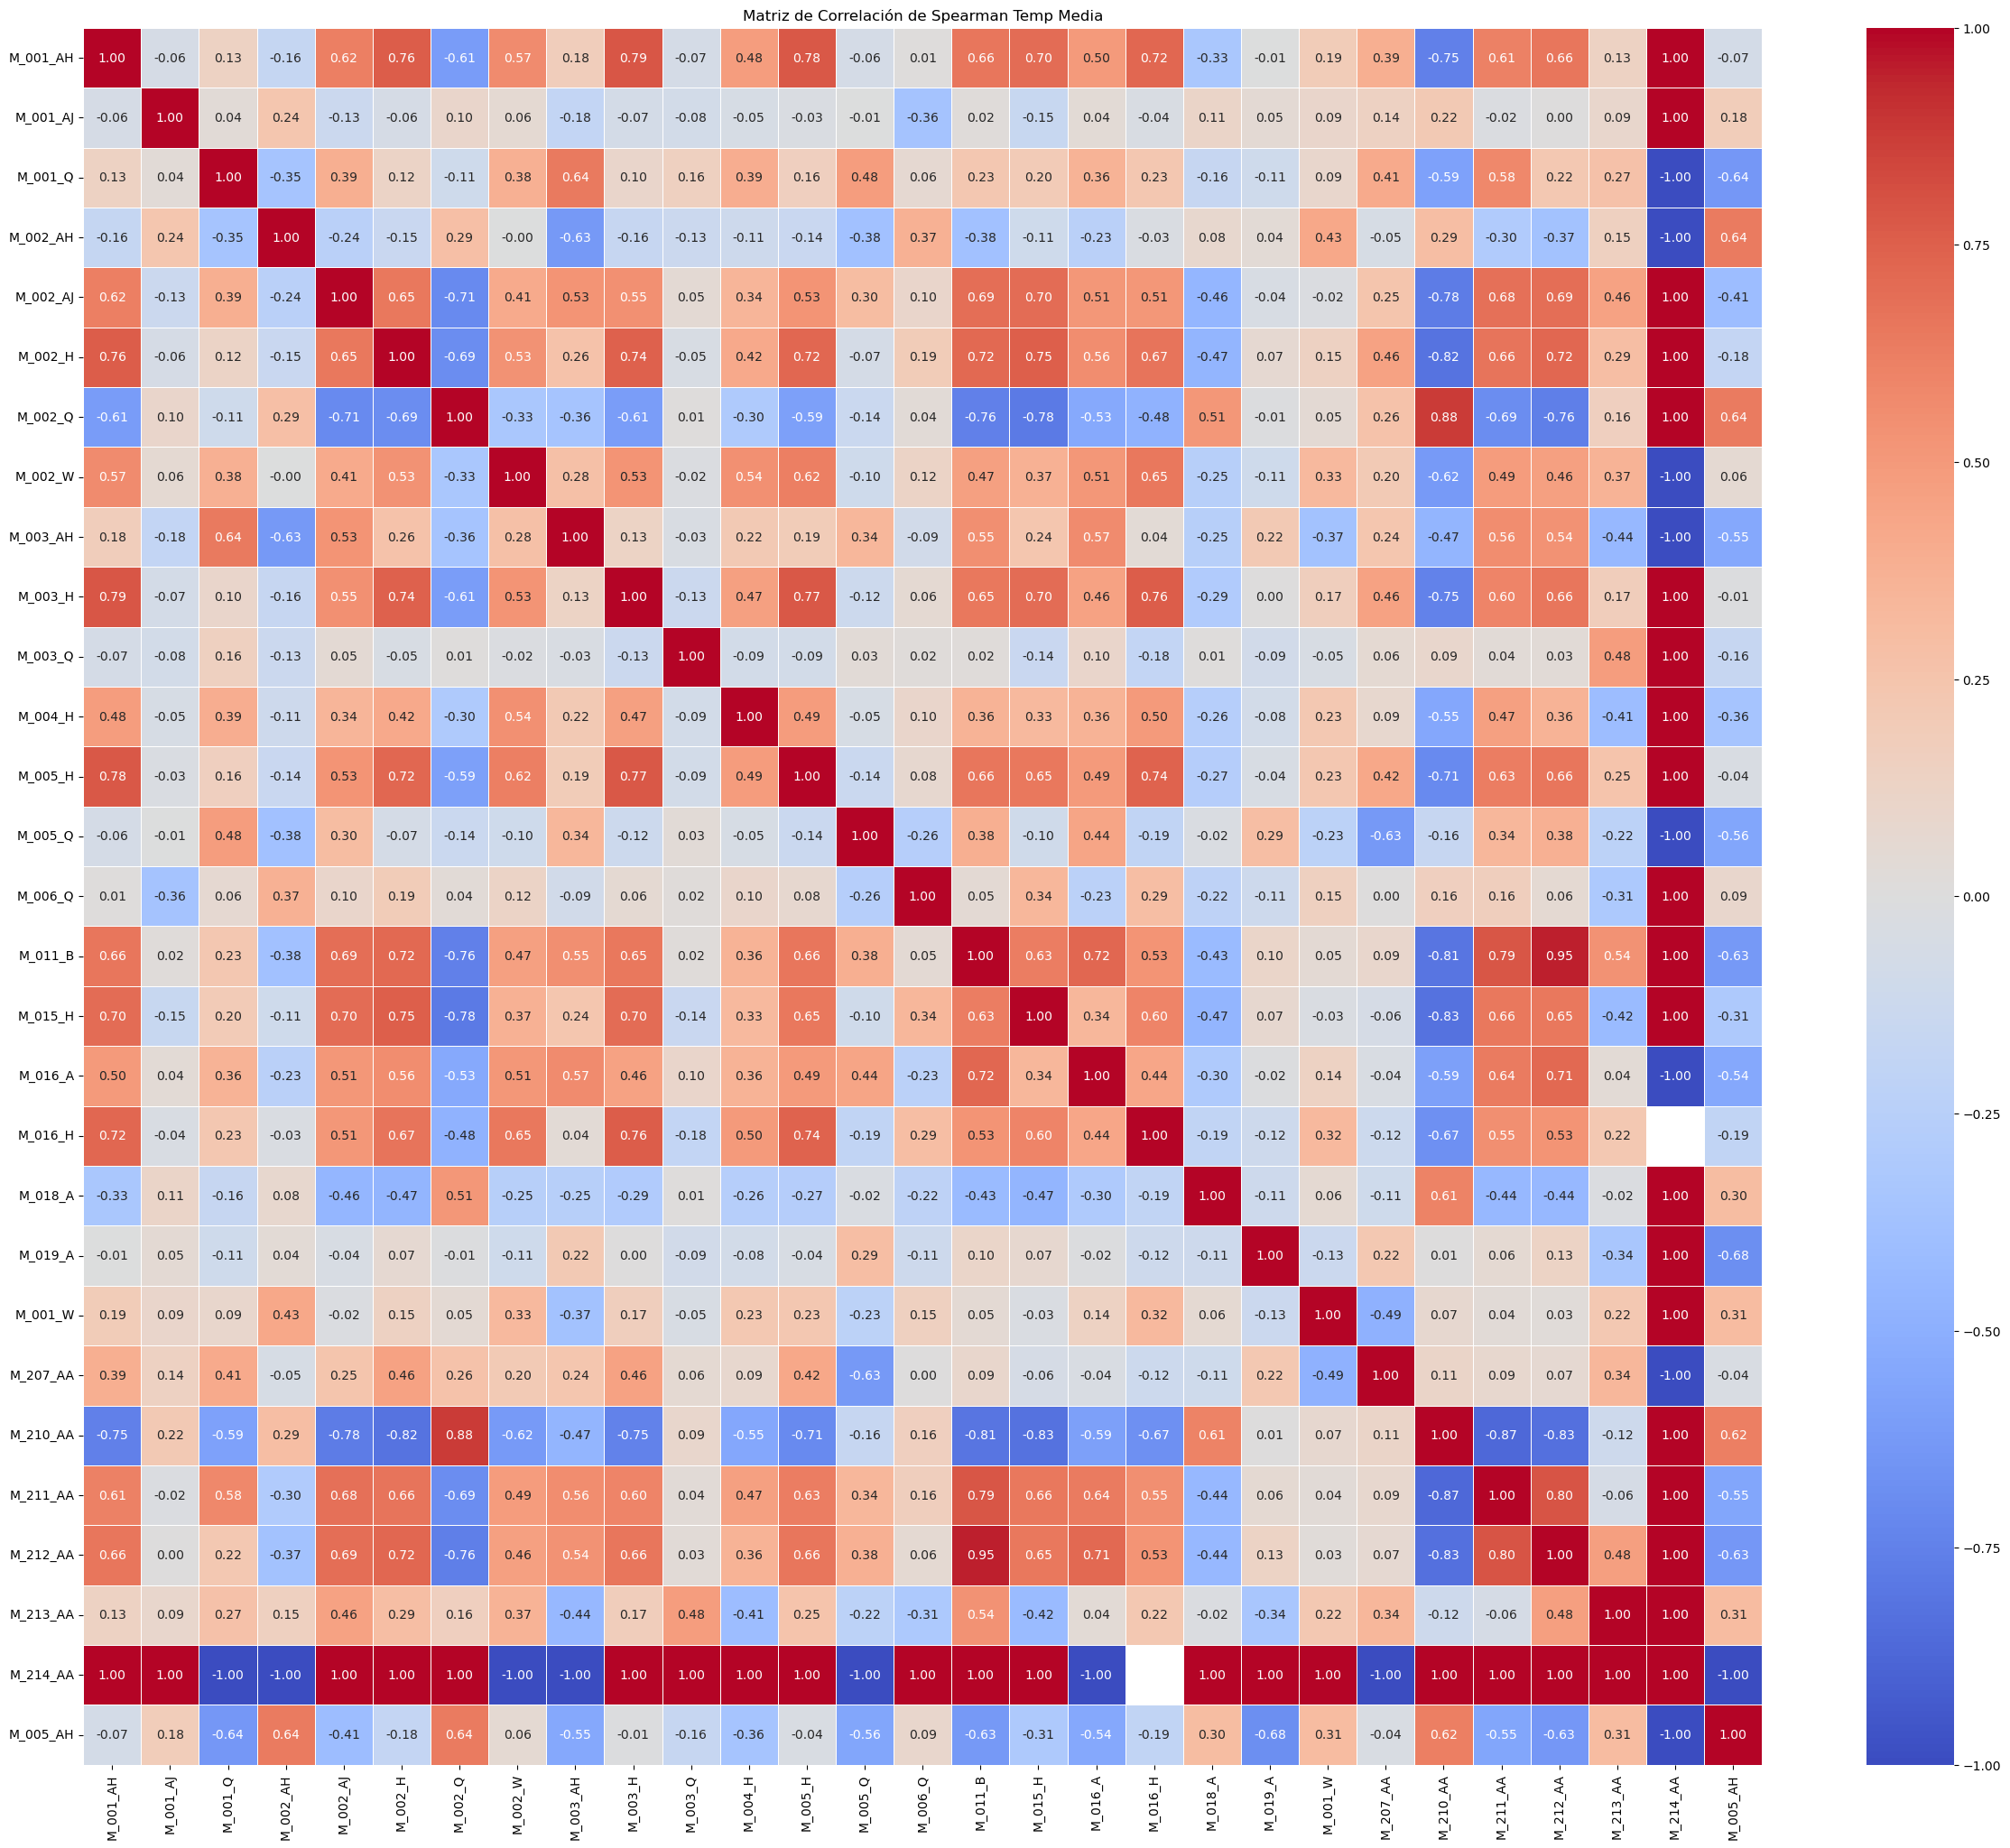

In [3]:
datos2.replace(-99.9, np.nan, inplace=True)

datos_numericos = datos2.select_dtypes(include=['float64', 'int64'])
matriz_correlacion = datos_numericos.corr(method='spearman')

plt.figure(figsize=(30, 25))
sns.heatmap(matriz_correlacion, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlación de Spearman Temp Media")
plt.show()

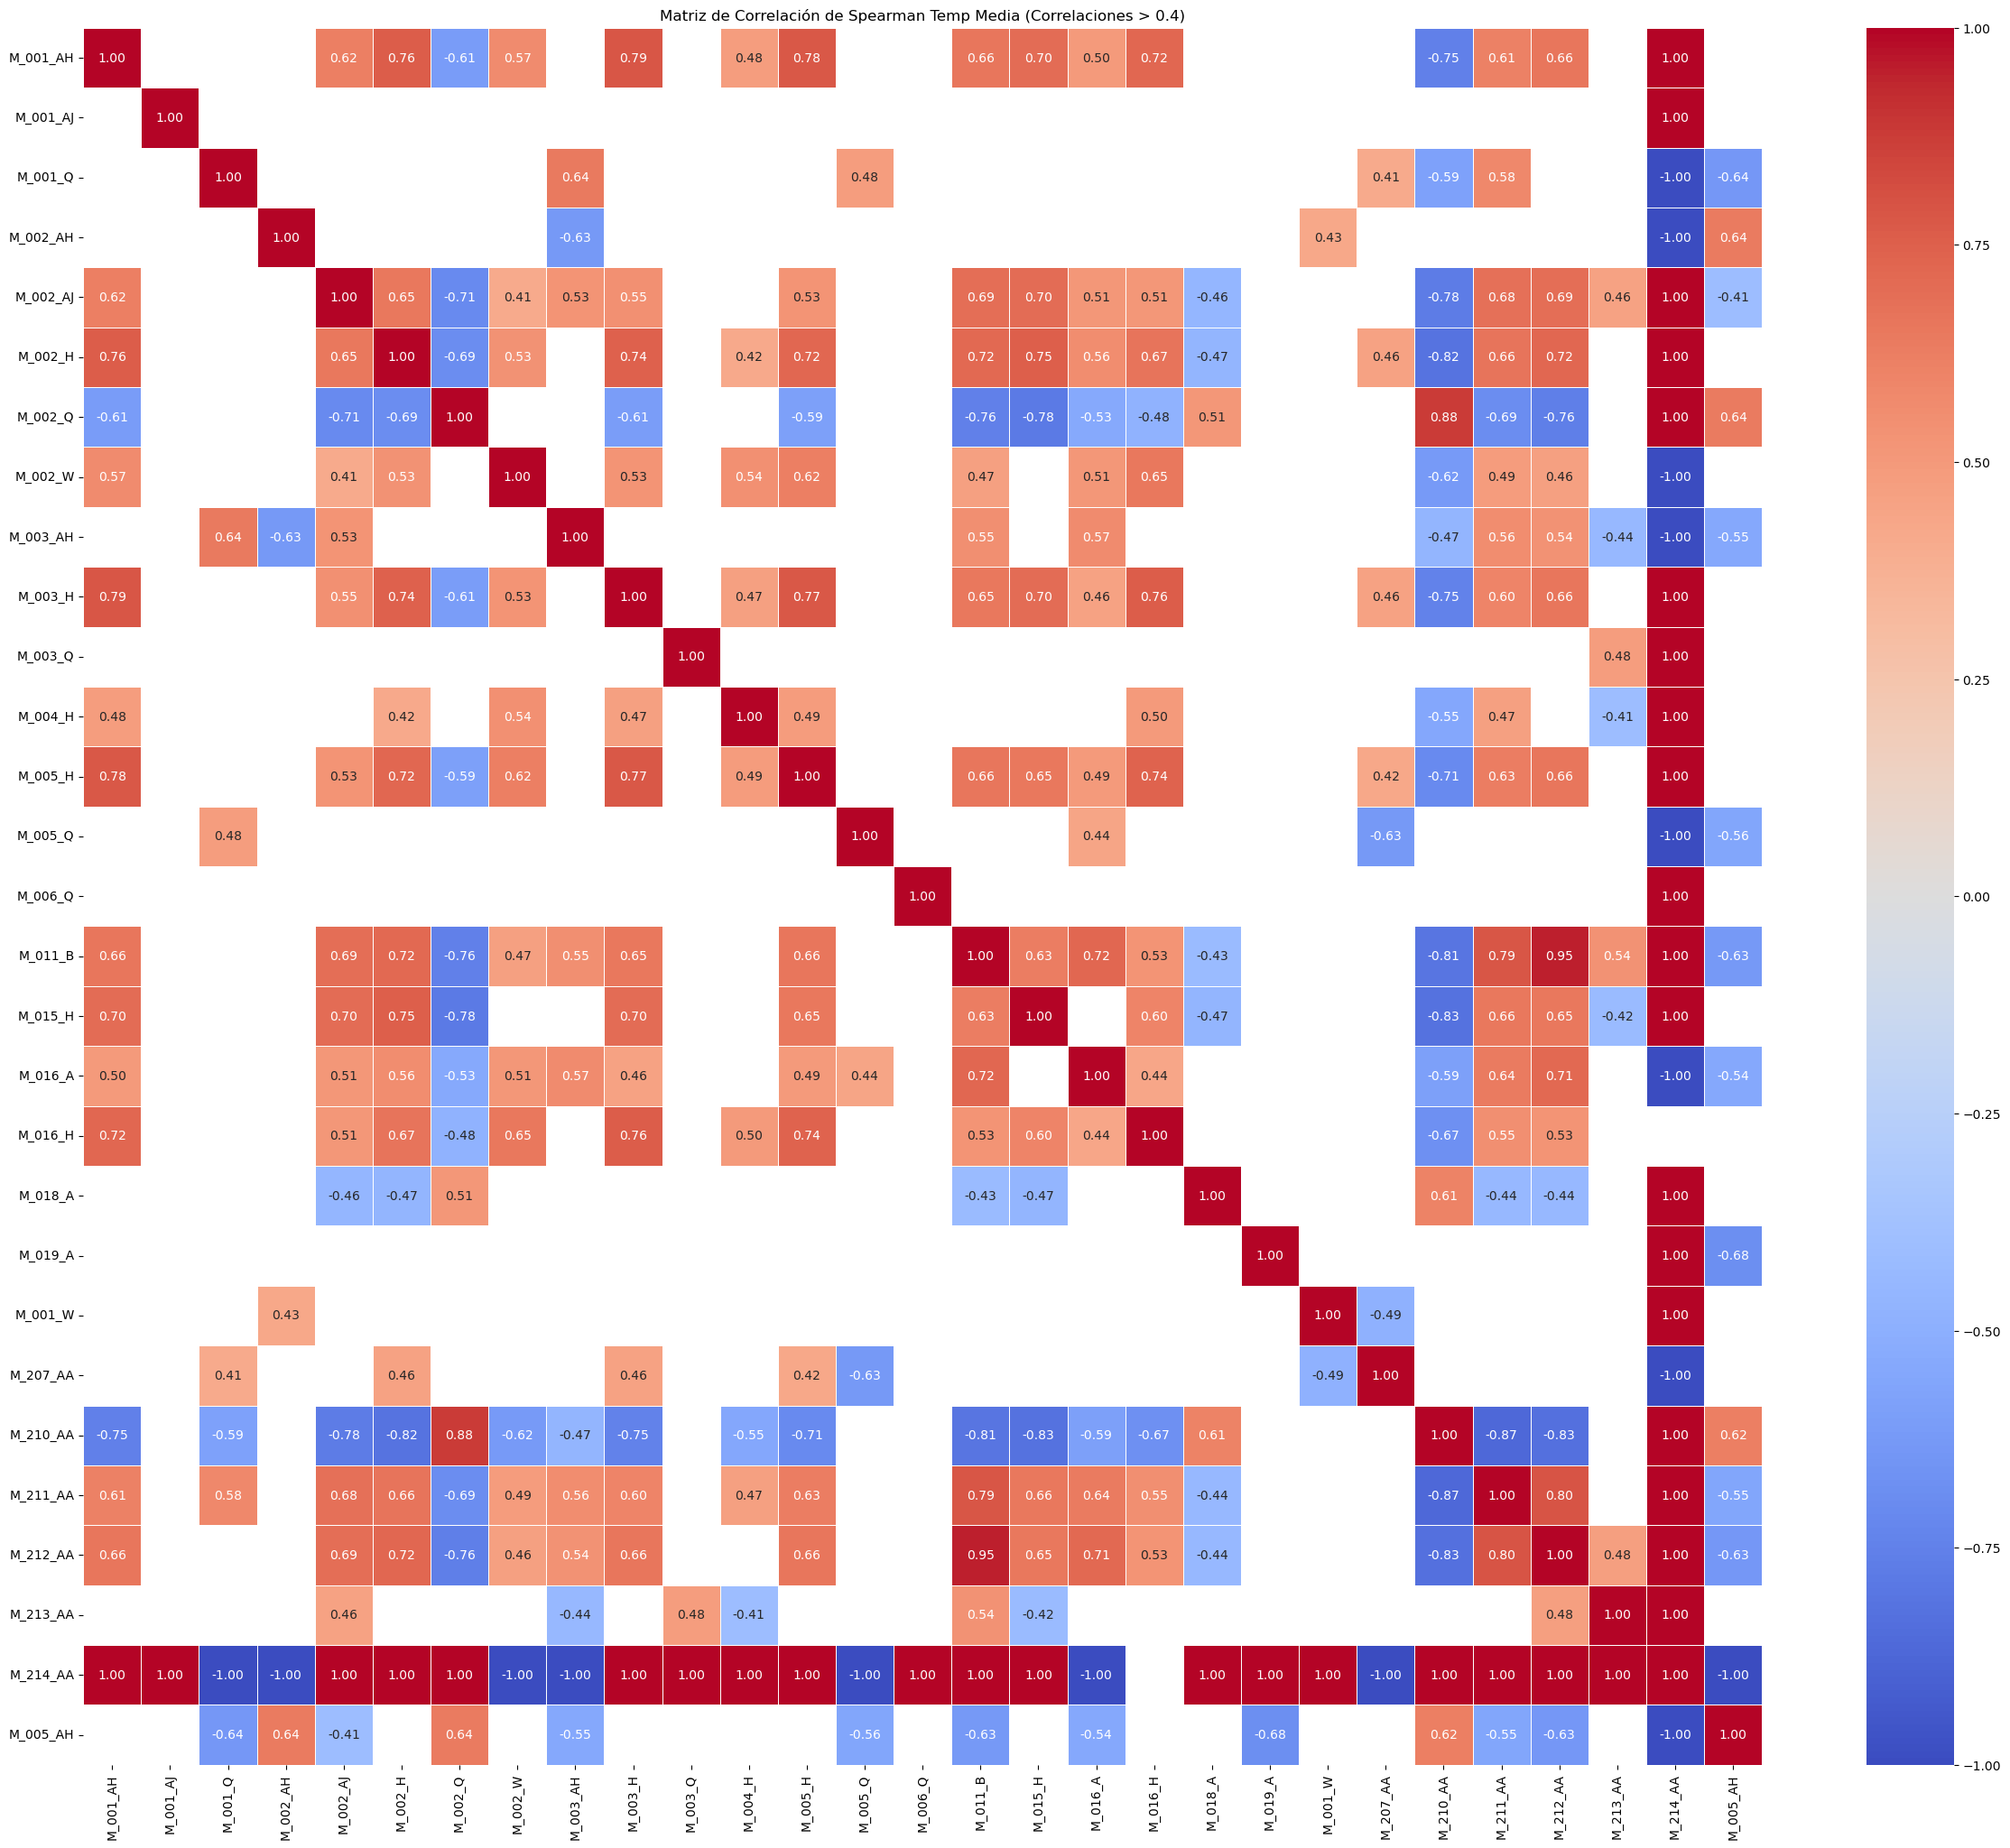

In [4]:
datos2.replace(-99.9, np.nan, inplace=True)

datos_numericos = datos2.select_dtypes(include=['float64', 'int64'])
matriz_correlacion = datos_numericos.corr(method='spearman')

# Filtrar las correlaciones mayores a 0.4
matriz_filtrada = matriz_correlacion[matriz_correlacion.abs() > 0.4]

plt.figure(figsize=(30, 25))
sns.heatmap(matriz_filtrada, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlación de Spearman Temp Media (Correlaciones > 0.4)")
plt.show()

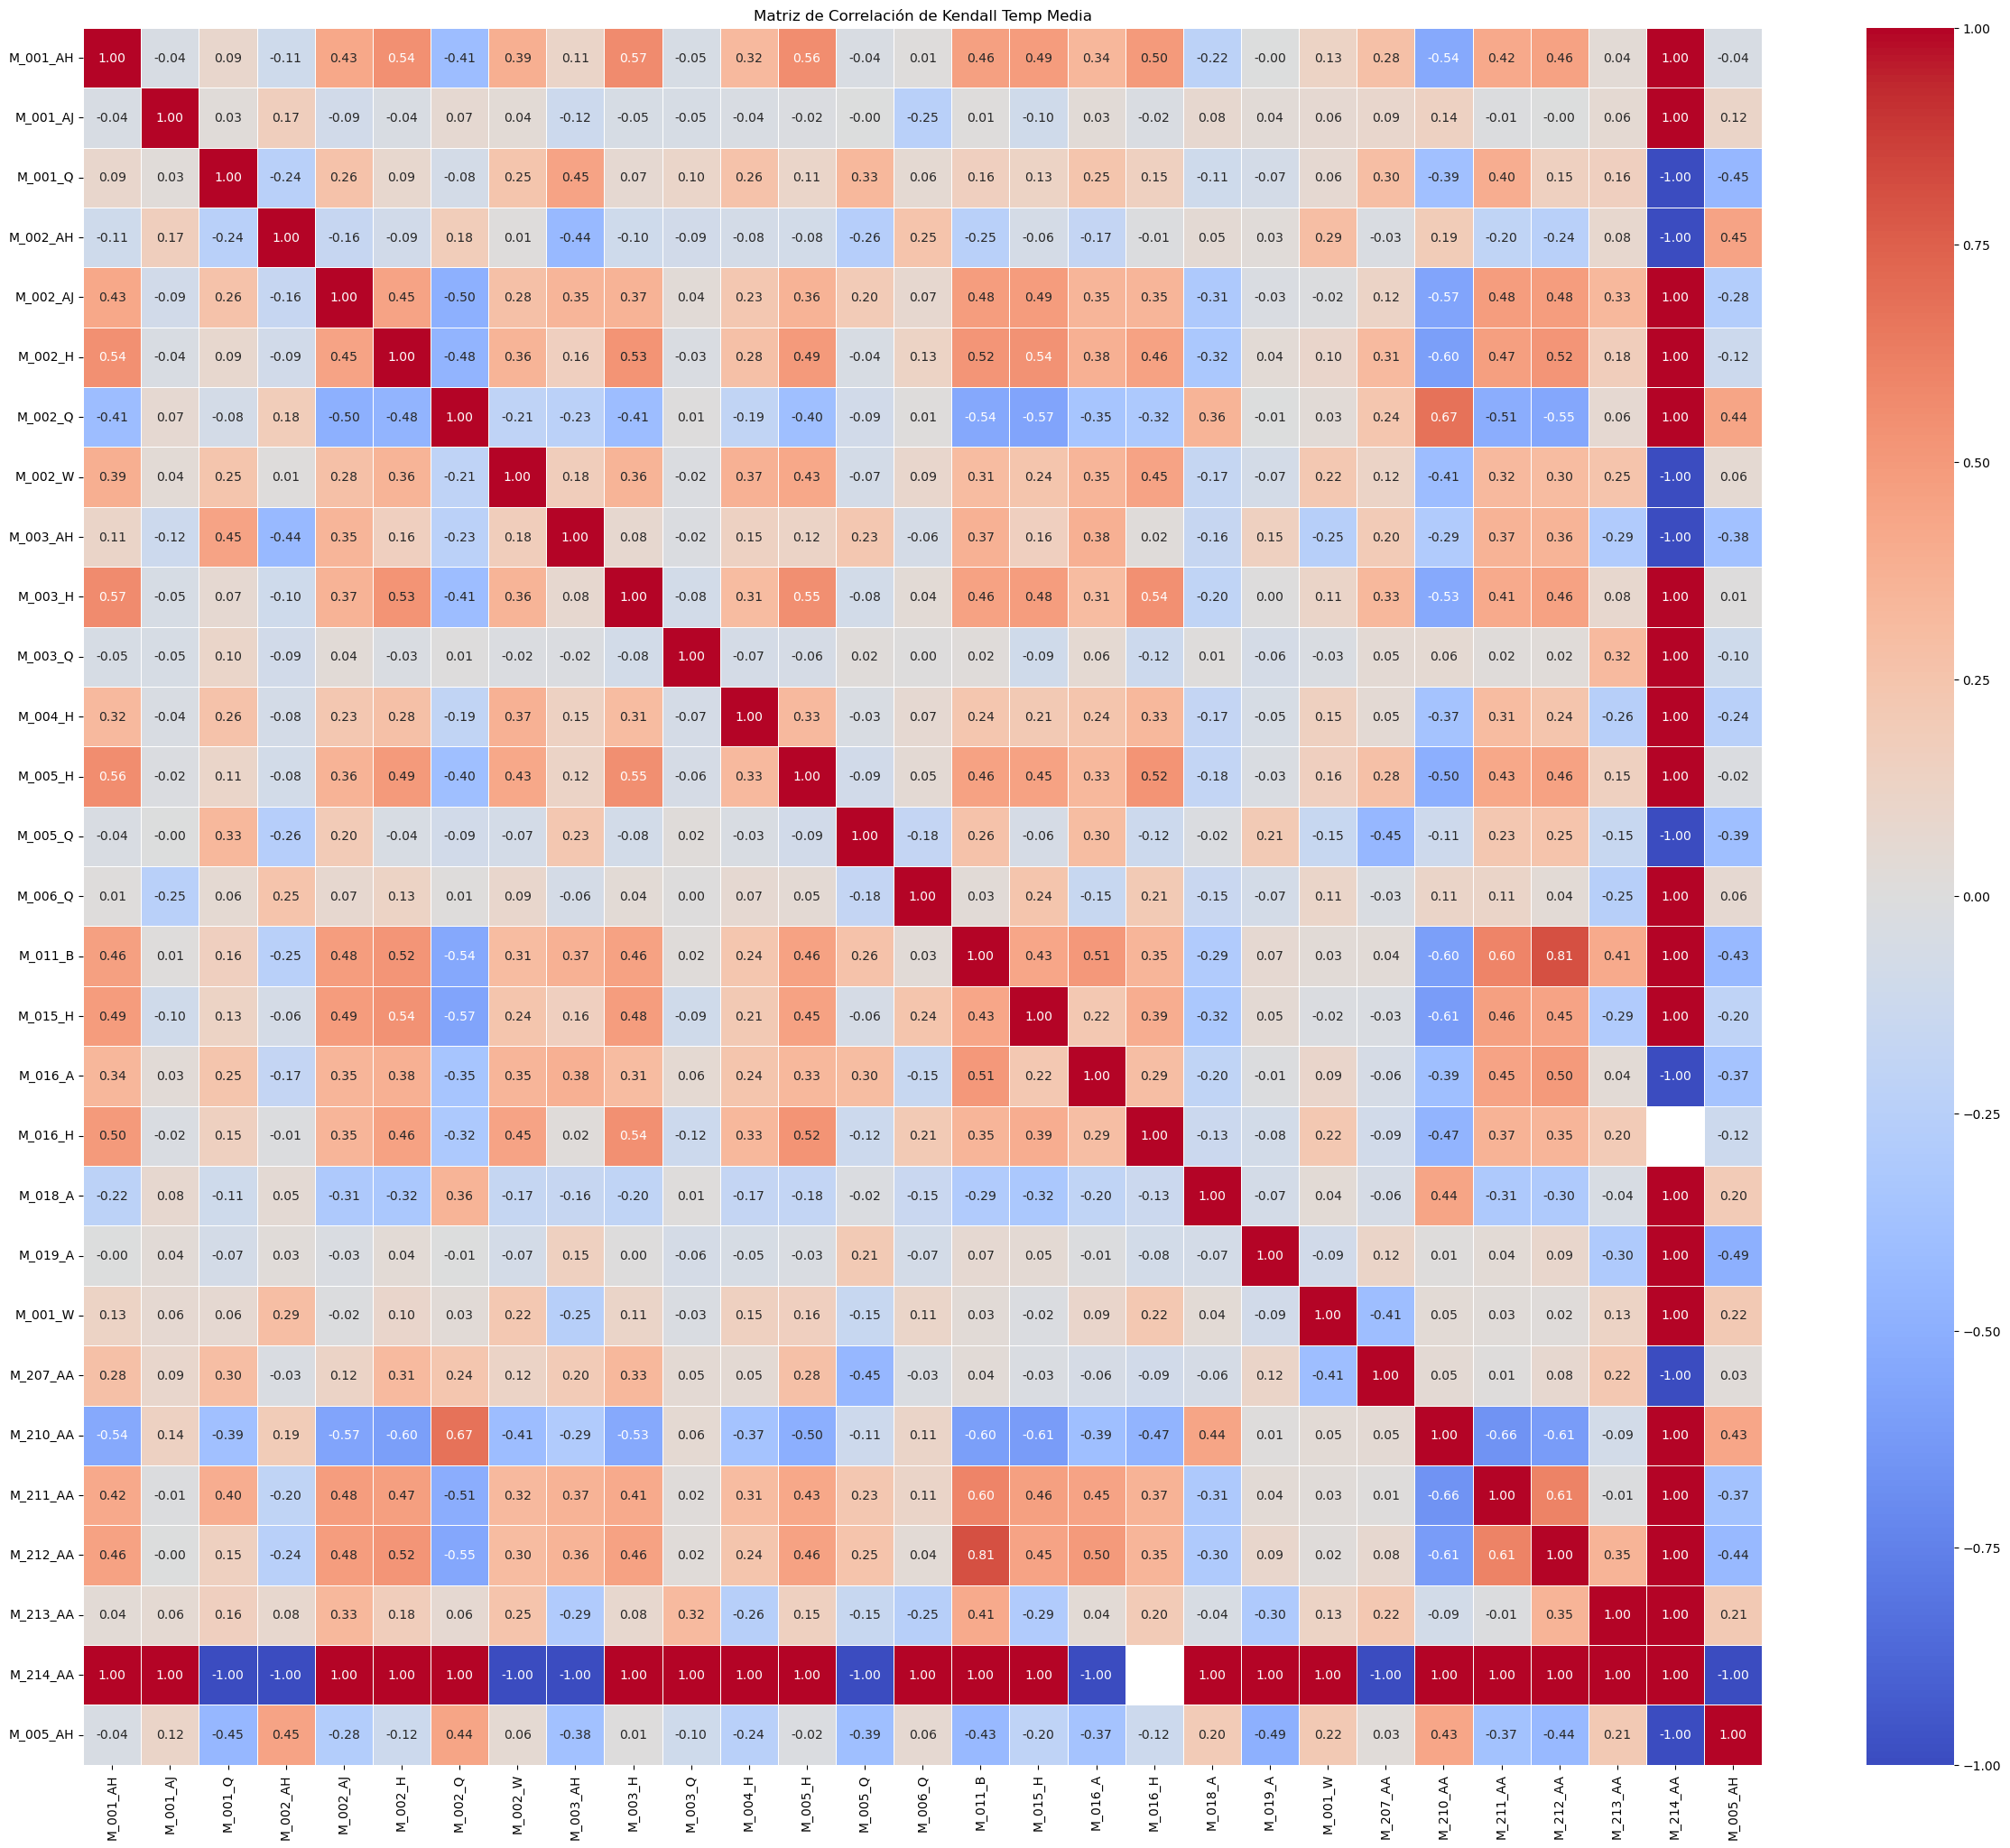

In [7]:
# Seleccionar solo las columnas numéricas
datos_numericos = datos2.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación de Kendall
matriz_correlacion_kendall = datos_numericos.corr(method='kendall')

# Crear el heatmap
plt.figure(figsize=(30, 25))
sns.heatmap(matriz_correlacion_kendall, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlación de Kendall Temp Media")
plt.show()

In [1]:
import folium
import pandas as pd

# Lee el archivo CSV con las latitudes y longitudes
data = pd.read_csv('MatrizTMI.csv', encoding='latin-1', low_memory=False)

# Crea un mapa centrado en una ubicación inicial
mapa = folium.Map(location=[data['LAT_Y'].mean(), data['LON_X'].mean()], zoom_start=10)

# Utiliza un conjunto para realizar un seguimiento de las estaciones ya agregadas
estaciones_agregadas = set()

# Añade marcadores para cada estación meteorológica usando 'ID_CIDERH'
for index, row in data.iterrows():
    # Verifica si la estación ya ha sido agregada
    if row['ID_CIDERH'] not in estaciones_agregadas:
        popup_text = f"ID_CIDERH: {row['ID_CIDERH']}"
        # Añade el marcador con el nombre de la estación
        folium.Marker([row['LAT_Y'], row['LON_X']], popup=popup_text).add_to(mapa)
        # Agrega la estación al conjunto
        estaciones_agregadas.add(row['ID_CIDERH'])

# Guarda el mapa como un archivo HTML
mapa.save('Mapa_Estaciones_I.html')